# Project: Investigate a tmdb Movie Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project, I am going to investigate a TMDB movie dataset which consists data for around 10,000 movies. This dataset has been downloaded from Udacity Data Analyst portal and was originally from Kaggle. This data set contains various information regarding the movies like revenue, budget, title etc.

### Question:

1. What is the maximum, minimum and average runtime for the movies and plot a histogram for the same?
2. Is there a correlation among revenue, budget and popularity?
3. How is the profit increasing over the years?
4. How is runtime of the movies changing over time?
5. What are the top 10 movies according to the average votes?



In [65]:
# Import all the packages to be used in this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
from datetime import datetime
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

In this section of the report, I will load in the data, check for cleanliness, and then trim and clean your dataset for analysis.ns.

### General Properties

In [66]:
# Load your data 
df_movie = pd.read_csv('tmdb-movies.csv')

In [67]:
#Print the top 5 rows of the dataset
df_movie.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [68]:
#No. of rows and columns
df_movie.shape

(10866, 21)

* Let us get more information about the dataset and find about the null values.

In [69]:
#summary of the dataset
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [70]:
#No. of unique items in columns
df_movie.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

* Plotting a histogram for every coloumns to get more details
https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib

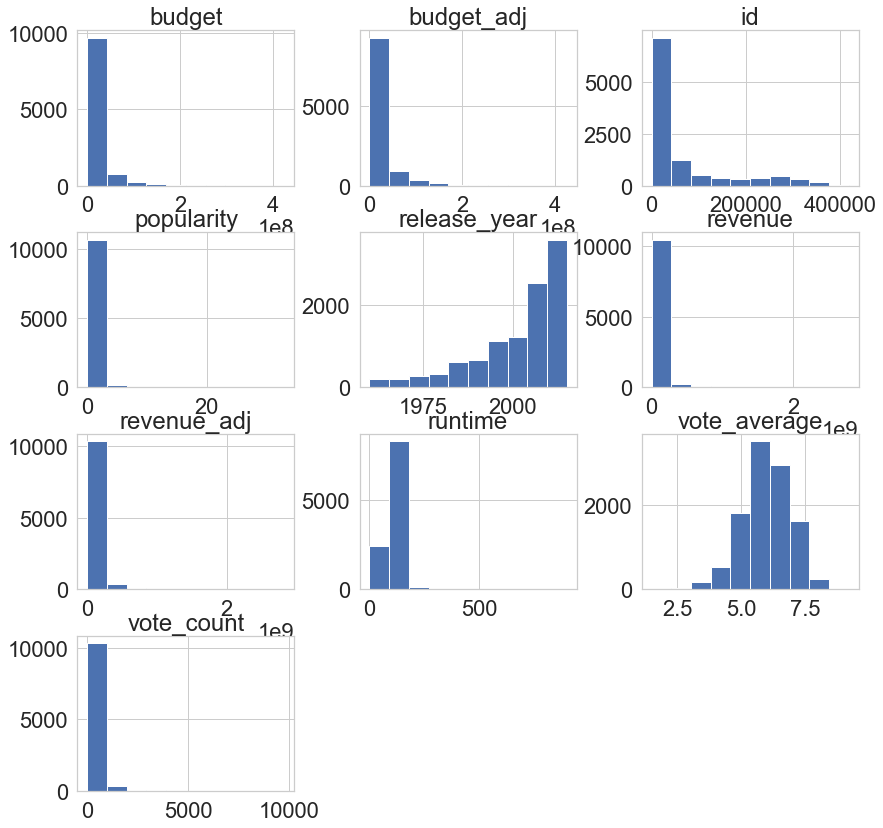

In [71]:
#plotting histogram
df_movie.hist(figsize=(14,14));

#### Findings

* We have more movies in the dataset that were released after 2000s
* Release year histogram is right-skewed
* The media of the vote_average is around 6.

We can get more statistical information below:

In [72]:
#statistical information
df_movie.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09



### Data Cleaning for the Dataset

#### After observing the data, we can point out the following things:
1. There are many null values that need to be deleted.
2. The runtime shows a min of 0 which should be removed.
3. The type of column release_date is string and we need to change it to datetime.
4. The duplicate values if any will be deleted.
5. The column which are not neccessary in carrying out this analysis will also be removed.

In [73]:
#Remove the unnecessary columns
df_movie_clean = df_movie.copy()  
remove_col = ['id', 'imdb_id', 'homepage', 'keywords', 'overview', 'production_companies','tagline']
df_movie_clean = df_movie_clean.drop(remove_col, 1)
df_movie_clean.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [74]:
#total duplicate values in the data
df_movie_clean.duplicated().sum()

1

In [75]:
df_movie.drop_duplicates(inplace=True)
#confirm whether the duplicate value is deleted
df_movie.duplicated().sum()

0

In [76]:
#change type of release_date to datetime
#https://www.geeksforgeeks.org/convert-the-column-type-from-string-to-datetime-format-in-pandas-dataframe/
df_movie_clean['release_date']= pd.to_datetime(df_movie_clean['release_date'])
df_movie_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   popularity      10866 non-null  float64       
 1   budget          10866 non-null  int64         
 2   revenue         10866 non-null  int64         
 3   original_title  10866 non-null  object        
 4   cast            10790 non-null  object        
 5   director        10822 non-null  object        
 6   runtime         10866 non-null  int64         
 7   genres          10843 non-null  object        
 8   release_date    10866 non-null  datetime64[ns]
 9   vote_count      10866 non-null  int64         
 10  vote_average    10866 non-null  float64       
 11  release_year    10866 non-null  int64         
 12  budget_adj      10866 non-null  float64       
 13  revenue_adj     10866 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(5), object(4)


In [77]:
#changing 0 values to NaN and dropping it
df_movie_clean['runtime'] =df_movie_clean['runtime'].replace(0, np.NAN)
df_movie_clean.dropna(inplace=True)

In [78]:
#Check no.of rows and columns
df_movie_clean.shape

(10704, 14)

*The values in the dataset is now reduced to 10704 and there are 14 columns now

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 
#### What is the maximum, minimum and average runtime for the movies and plot a histogram for the same?

Here we will try to find the different runtimes of the movies and then plot it on the histogram and get some insights from it.



In [79]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
avg_runtime = df_movie_clean.runtime.mean()
avg_runtime

102.73589312406577

In [80]:
#Find max runtime
max_runtime = df_movie_clean.runtime.max()
df_movie_clean.loc[df_movie_clean['runtime'] == max_runtime]

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
3894,0.006925,0,0,The Story of Film: An Odyssey,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...,Mark Cousins,900.0,Documentary,2011-09-03,14,9.2,2011,0.0,0.0


* The longest runtime movie as per the data is The Story of Film: An Odyssey having a runtime of 900 min.

In [81]:
min_runtime = df_movie_clean.runtime.min()
df_movie_clean.loc[df_movie_clean['runtime'] == min_runtime]

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1112,0.202776,0,0,Batman: Strange Days,Kevin Conroy|Brian George|Tara Strong,Bruce Timm,3.0,Action|Animation,2014-04-09,20,7.6,2014,0.0,0.0
2232,0.267950,0,0,Scrat's Continental Crack-Up,Chris Wedge|Simon Pegg,Steve Martino|Mike Thurmeier,3.0,Animation,2010-12-25,20,7.1,2010,0.0,0.0
2830,0.254157,0,0,Shrek in the Swamp Karaoke Dance Party,Mike Myers|Eddie Murphy,Vicky Jenson|Andrew Adamson,3.0,Animation|Comedy|Music,2001-01-01,12,5.4,2001,0.0,0.0
3298,0.152615,0,0,MamÃ¡,Victoria Harris|Irma Monroig|Berta Ros,Andy Muschietti,3.0,Horror,2008-10-07,11,6.0,2008,0.0,0.0
3350,0.037628,0,0,The Black Hole,Napoleon Ryan,Philip Sansom|Olly Williams,3.0,Comedy|Crime,2008-01-01,13,7.1,2008,0.0,0.0
3891,0.028803,0,0,Scrat's Continental Crack-Up: Part 2,Chris Wedge,Steve Martino|Mike Thurmeier,3.0,Animation|Comedy|Adventure,2011-11-16,11,6.7,2011,0.0,0.0
5399,0.168542,0,0,Doodlebug,Jeremy Theobald,Christopher Nolan,3.0,Fantasy|Mystery,1997-01-01,47,6.5,1997,0.0,0.0
5993,0.039953,0,0,Lights Out,Lotta Losten,David F. Sandberg,3.0,Horror,2013-12-01,28,7.1,2013,0.0,0.0
8706,0.811101,0,0,For the Birds,Ralph Eggleston,Ralph Eggleston,3.0,Animation|Comedy|Family,2000-11-01,247,7.7,2000,0.0,0.0


* This is a quite interesting finding. There are 9 movies/shortfilms that have a runtime of 3 minutes.
1. Batman: Strange Days 
2. Scrat's Continental Crack-Up
3. Shrek in the Swamp Karaoke Dance Party
4. MamÃ¡
5. The Black Hole
6. Scrat's Continental Crack-Up: Part 2
7. Doodlebug
8. Lights Out
9. For the Birds

In [82]:
#Similar findings using describe
df_movie_clean['runtime'].describe()

count    10704.000000
mean       102.735893
std         30.078104
min          3.000000
25%         90.000000
50%         99.000000
75%        112.000000
max        900.000000
Name: runtime, dtype: float64

Hence, we can confirm that our findings are correct
Now let us make a histogram for the same.

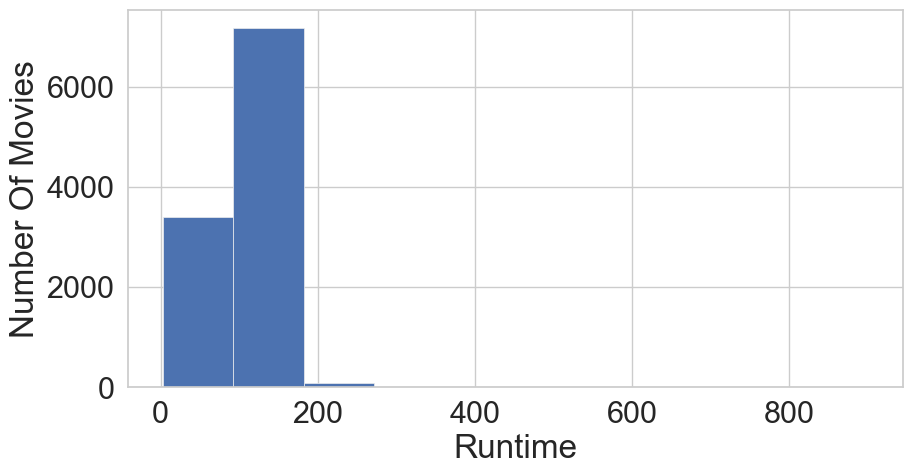

In [83]:
# histrogram for runtime and the number of movies

# figure size
plt.figure(figsize=(10,5), dpi = 100)

#x-axis name
plt.xlabel('Runtime')
#y-axis name 
plt.ylabel('Number Of Movies')

# plot relationship between runtime and number of movies
plt.style.use('ggplot')
fig = plt.hist(df_movie_clean.runtime, bins=10)
plt.show()

#### Conclusion
We found that the minimum, maximum and average runtime for movies are 3 minutes, 900 minutes and 103 minutes respectively.
According to the histogram, most of the movies are having a runtime between 100-180 minutes

### Research Question 2
#### Is there a correlation among revenue,  budget and popularity?

Here, we would consider three variables i.e. revenue, budget and popularity to find whether there is a relation among them or not.

In [84]:
#Find correlation
df_movie_clean.corr()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
popularity,1.000000,0.544060,0.662816,0.136340,0.800671,0.217644,0.093971,0.511877,0.608315
budget,0.544060,1.000000,0.734365,0.190968,0.631917,0.086733,0.120057,0.968864,0.621629
revenue,0.662816,0.734365,1.000000,0.163734,0.790826,0.178267,0.059758,0.705823,0.918965
runtime,0.136340,0.190968,0.163734,1.000000,0.164423,0.175088,-0.114748,0.221583,0.176925
vote_count,0.800671,0.631917,0.790826,0.164423,1.000000,0.260445,0.111063,0.586120,0.707425
vote_average,0.217644,0.086733,0.178267,0.175088,0.260445,1.000000,-0.126691,0.099317,0.199222
release_year,0.093971,0.120057,0.059758,-0.114748,0.111063,-0.126691,1.000000,0.020390,-0.064359
budget_adj,0.511877,0.968864,0.705823,0.221583,0.586120,0.099317,0.020390,1.000000,0.645771
revenue_adj,0.608315,0.621629,0.918965,0.176925,0.707425,0.199222,-0.064359,0.645771,1.000000


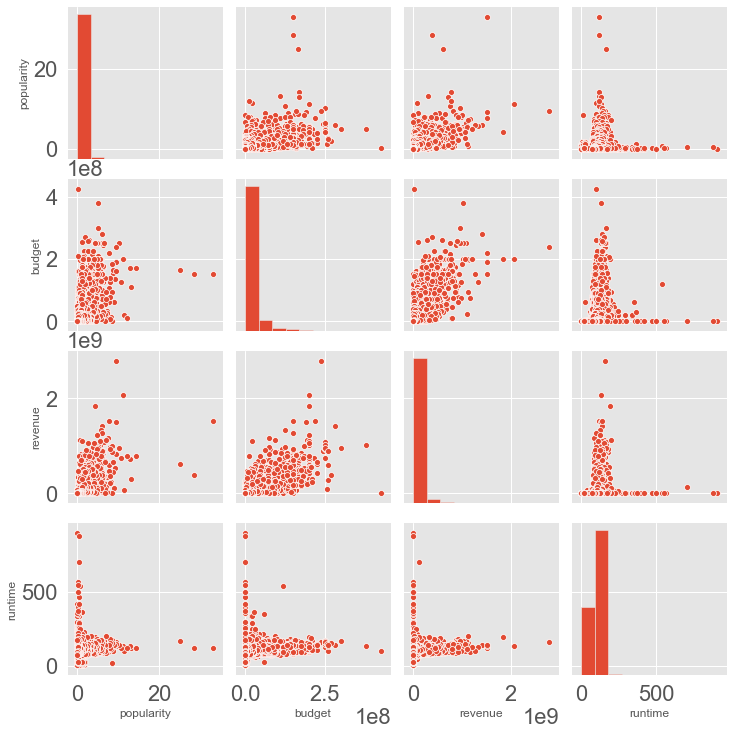

In [85]:
#correlation for specific variables
df_corr = df_movie_clean[['popularity', 'budget', 'revenue', 'runtime']]
#plotting the relation
sns.pairplot(df_corr, kind="scatter")
plt.show()

#### Conclusion

As expected, We can find a positive relation between revenue and budget.
Also, we can see some kind of positive relation between budget and popularity.




### Research Question 3  
#### How is the profit increasing over the years?

Here we will find whether film industry is profitable or not by finding out the revenue it is generating over time.

In [86]:
#Create a dataset for budget and revenue

df_new = df_movie_clean[['budget', 'revenue', 'release_year']]
df_new.head()

,budget,revenue,release_year
0,150000000,1513528810,2015
1,150000000,378436354,2015
2,110000000,295238201,2015
3,200000000,2068178225,2015
4,190000000,1506249360,2015


We will make a function in order to get the total amounts of revenue and budget.

In [87]:
#Create a function which sums up the amount
def sum_it(col1, col2):
    sum_amount = df_movie_clean.groupby(col1)[col2].sum()
    return sum_amount


Now we will plot a line chart for the same

In [88]:
#Use the sum_it function to get the total revenue and budget over the years
rev_movie = sum_it('release_year','revenue')
bud_movie = sum_it('release_year','budget')

#Find the difference between the revenue and budget
df_diff = rev_movie - bud_movie

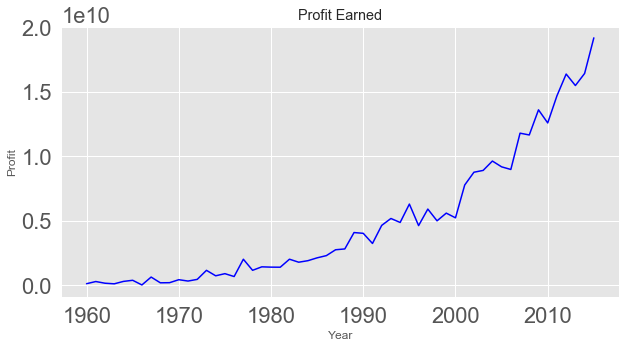

In [89]:
# Plot a line chart to find the relation of profit over time
df_diff.plot(kind='line',color='blue',title='Profit Earned',figsize = (10,5))
#x-axis name
plt.xlabel('Year')
#y-axis name
plt.ylabel('Profit');

### Conclusion

Hence, we can say that the profit is increasing over the years
It means that the film industry is quite profitable and there is alot of opportunities here.

### Research Question 4   

#### How is runtime of the movies changing over time?

Here we will take into consideration two variables namely Runtime which would be the dependent variable and time which will be the independent variable.
We will start with calculating of the average runtime in all the years.

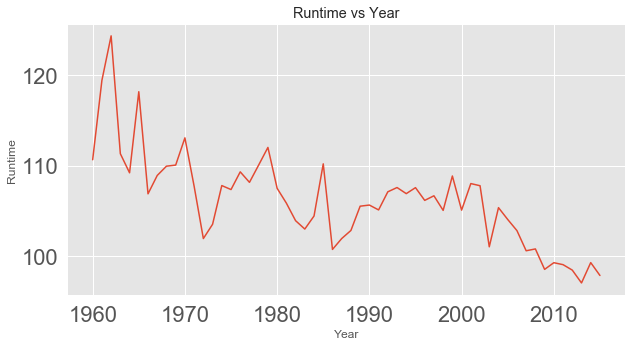

In [90]:
# count the number of unique release_year
year_movie = df_movie_clean["release_year"].unique()

#Find the average runtime for different years
runt = df_movie_clean.groupby('release_year')['runtime'].mean()

#Plot the relationship between runtime over years
runt.plot(kind='line',title='Runtime vs Year', figsize=(10,5))
#x-axis name
plt.xlabel('Year')
#y-axis name
plt.ylabel('Runtime');

### Conclusion
From the above line chart, we can say that over the years the runtime of the movies is decreasing and it would be better to avoid making long movies.
In 1960s, people used to prefer watching movies which were more than 2 hours long. However, the trend has been changed and the runtime of the movies has decreased.

### Research Question 5   

#### What are the top 10 movies according to the average votes?

Let us find out what are the top 10 movies based on the average votes the movies have received.

In [91]:
#Top 10 highest votes
df_top10 = df_movie_clean.nlargest(10,'vote_average')
df_top10

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
3894,0.006925,0,0,The Story of Film: An Odyssey,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...,Mark Cousins,900.0,Documentary,2011-09-03,14,9.2,2011,0.000000e+00,0.000000e+00
1200,0.129531,0,0,Black Mirror: White Christmas,Jon Hamm|Rafe Spall|Oona Chaplin|Natalia Tena|...,Carl Tibbetts,74.0,Drama|Horror|Mystery|Science Fiction|Thriller,2014-12-16,41,8.8,2014,0.000000e+00,0.000000e+00
6911,0.212010,0,0,Pink Floyd: Pulse,David Gilmour|Nick Mason|Richard Wright|Sam Br...,David Mallet,145.0,Music,2006-07-09,23,8.7,2006,0.000000e+00,0.000000e+00
3690,0.321341,0,0,The Art of Flight,Travis Rice|Nicolas Muller|Mark Landvik|Jake B...,Curt Morgan,80.0,Adventure|Documentary,2011-09-08,60,8.5,2011,0.000000e+00,0.000000e+00
8221,0.194889,0,0,A Personal Journey with Martin Scorsese Throug...,Martin Scorsese|Brian De Palma|Gregory Peck|Fr...,Martin Scorsese|Michael Henry Wilson,225.0,Documentary,1995-05-21,11,8.5,1995,0.000000e+00,0.000000e+00
8411,0.302908,0,0,Queen - Rock Montreal,Freddie Mercury|Roger Taylor|John Deacon|Brian...,Saul Swimmer,138.0,Music,1981-11-24,14,8.5,1981,0.000000e+00,0.000000e+00
8839,0.157001,0,0,Dave Chappelle: Killin' Them Softly,Dave Chappelle,Stan Lathan,57.0,Comedy,2000-01-01,17,8.5,2000,0.000000e+00,0.000000e+00
609,0.033378,0,0,The Jinx: The Life and Deaths of Robert Durst,Robert Durst|Andrew Jarecki|Marc Smerling|Zach...,Andrew Jarecki,240.0,Documentary,2015-02-08,72,8.4,2015,0.000000e+00,0.000000e+00
2334,0.145026,0,0,Rush: Beyond the Lighted Stage,Sebastian Bach|Jack Black|Jimmy Chamberlin|Ged...,Sam Dunn|Scot McFadyen,107.0,Documentary|Music,2010-06-29,14,8.4,2010,0.000000e+00,0.000000e+00
4178,7.192039,25000000,28341469,The Shawshank Redemption,Tim Robbins|Morgan Freeman|Bob Gunton|William ...,Frank Darabont,142.0,Drama|Crime,1994-09-10,5754,8.4,1994,3.677779e+07,4.169346e+07


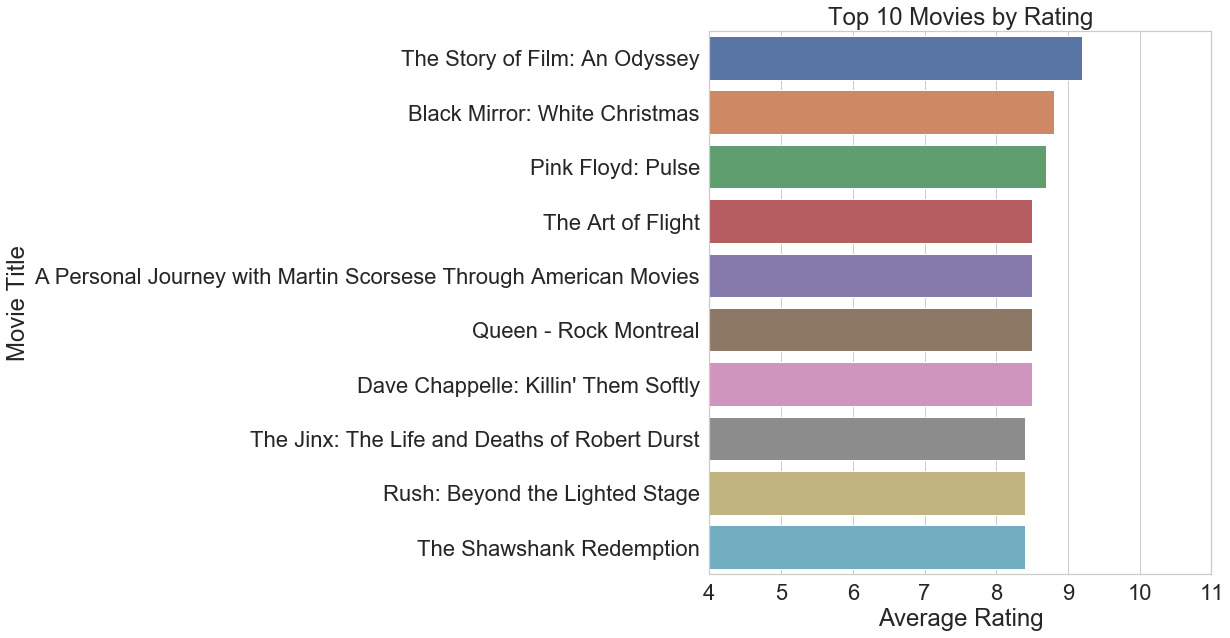

In [92]:
#Sort the values to descending for the bar plot
df_top10 = df_top10.sort_values(by = 'vote_average', ascending = False)
sns.set(style="whitegrid", font_scale= 2);
f, ax = plt.subplots(figsize=(9, 10));
ax = sns.barplot( x='vote_average', y='original_title', data=df_top10);
ax.set(xlim=(4,11),ylabel="Movie Title",  xlabel="Average Rating");
plt.title('Top 10 Movies by Rating');


### Conclusion
Hence, we can conclude the top 10 movies which received the highest number of average votes are as follows:
1. The Story of Film: An Odyssey
2. Black Mirror: White Christmas
3. Pink Floyd: Pulse
4. The Art of Flight
5. A Personal Journey with Martin Scorsese Through American Movies
6. Queen - Rock Montreal
7. Dave Chappelle: Killin' Them Softly
8. The Jinx: The Life and Deaths of Robert Durst
9. Rush: Beyond the Lighted Stage
10. The Shawshank Redemption
 

<a id='conclusions'></a>
## Final Conclusions

* The average runtime is 103 minutes.
* We found movies with runtime as short as 3 minutes and as long as 900 min.
* Film industry has proved to be a profitable business over time with revenue increasing over time.
* We found a relation between budget and revenue using plots.
* The runtime of the movies is getting shorter 
* The documentary 'The Story of Film: An Odyssey' has received maximum average votes. It is the same movie having a total runtime of around 900 min.

## Limitations:
There were some limitations while working on this project and doing the analysis which are as follows:
* The datatype was incorrect for example release_date type was string.
* There were some null values
* Duplicates values in the data effects the result
* Unnecessary columns that were not required for the analysis.
* Genres and production companies were grouped together.


In [93]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0

### Reference

https://www.geeksforgeeks.org/convert-the-column-type-from-string-to-datetime-format-in-pandas-dataframe/